<a href="https://colab.research.google.com/github/hgabrali/Data-Science-Project-Prototypes/blob/main/Customer_Segmentation_Using_Machine_Learning_(K_Means_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation Using Machine Learning (K-Means Clustering) – Full Python Data Science Project**

Reference : [Data Science with Onur](https://www.youtube.com/watch?v=-LGwdrajMZ0)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishakhdapat/customer-segmentation-clustering")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-segmentation-clustering' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-clustering


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
from google.colab import drive

drive.mount('/content/drive')
print("✅ Google Drive başarıyla bağlandı.")

Mounted at /content/drive
✅ Google Drive başarıyla bağlandı.


In [4]:
file_path = '/content/drive/MyDrive/customer_segmentation.csv'

df = pd.read_csv(file_path)



In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.shape

(2240, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum().sum()

np.int64(0)

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
df["Education"].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [14]:
df["Marital_Status"].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


**DATA CLEANING &  FEATURE ENGINEERING**

In [15]:
df["Dt_Customer"]= pd.to_datetime(df["Dt_Customer"], dayfirst= True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [17]:
# Calculating Age

df["Age"]= 2025- df["Year_Birth"]


In [18]:
df["Age"]

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [20]:
# Calculating total childeren

df["Total_Childeren"]= df["Kidhome"] + df["Teenhome"]
print(df["Total_Childeren"])

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Childeren, Length: 2216, dtype: int64


In [21]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Childeren'],
      dtype='object')

In [22]:
spend_cols= ["MntWines","MntFruits",
       "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds"]

In [23]:
df["Total_Spending"]= df[spend_cols].sum(axis=1)
df["Total_Spending"]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [24]:
df["Customer_Since"]= (pd.Timestamp("today")- df["Dt_Customer"]).dt.days

df["Customer_Since"]

,Customer_Since
0,4827
1,4277
2,4476
3,4303
4,4325
...,...
2235,4545
2236,4183
2237,4319
2238,4320


**EDA**

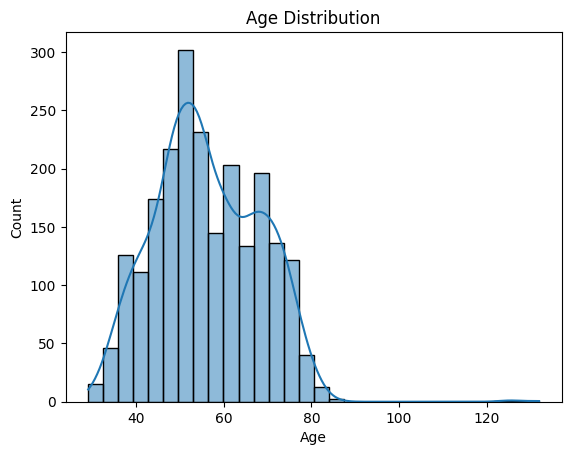

In [25]:
sns.histplot(df["Age"], bins= 30, kde= True)
plt.title("Age Distribution")
plt.show()

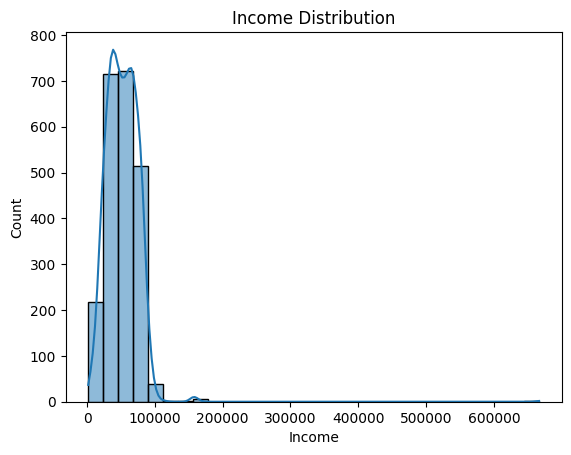

In [26]:
sns.histplot(df["Income"], bins= 30, kde= True)
plt.title("Income Distribution")
plt.show()

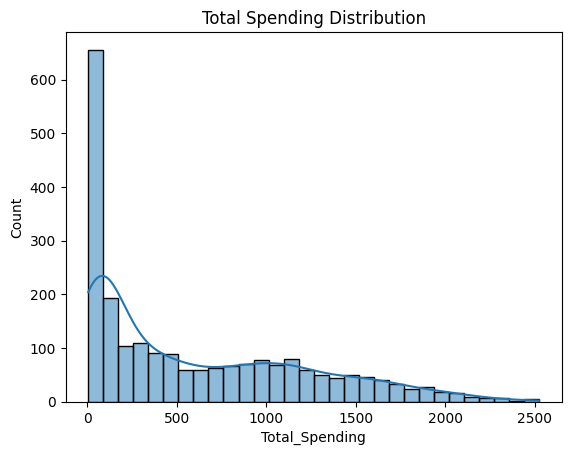

In [27]:
sns.histplot(df["Total_Spending"], bins= 30, kde=True)
plt.title("Total Spending Distribution")
plt.show()

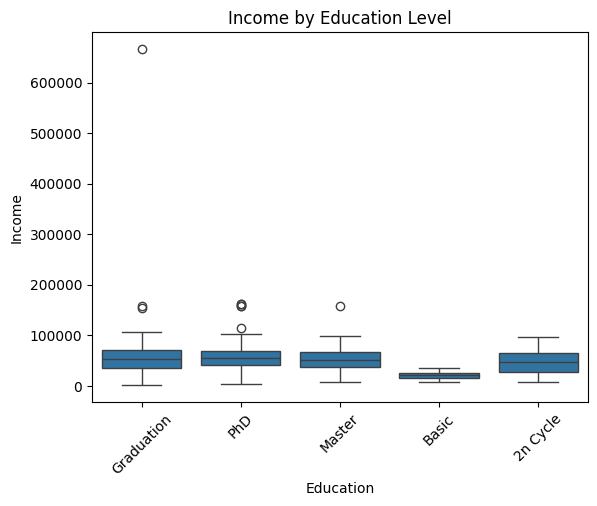

In [28]:
# Categorical Analysis

sns.boxplot(x="Education", y="Income", data= df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

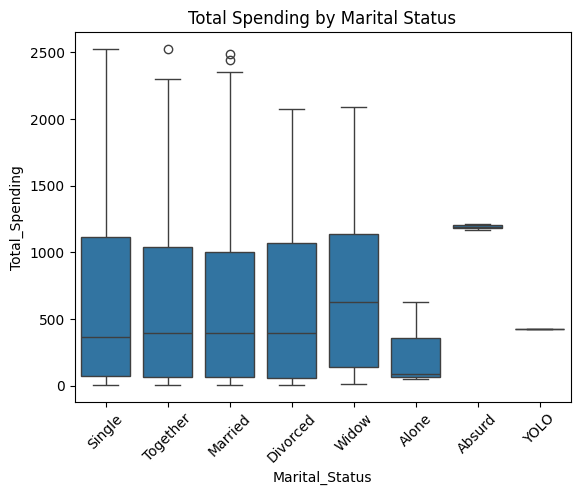

In [29]:
sns.boxplot(x="Marital_Status", y="Total_Spending", data=df)
plt.xticks(rotation=45)
plt.title("Total Spending by Marital Status")
plt.show()


In [30]:
# Correlation Analysis

corr = df[["Income", "Age", "Recency", "Total_Spending", "NumWebPurchases", "NumStorePurchases"]].corr()
print(corr)

                     Income       Age   Recency  Total_Spending  \
Income             1.000000  0.161791 -0.003970        0.667576   
Age                0.161791  1.000000  0.016295        0.113487   
Recency           -0.003970  0.016295  1.000000        0.020066   
Total_Spending     0.667576  0.113487  0.020066        1.000000   
NumWebPurchases    0.387878  0.153051 -0.005641        0.528973   
NumStorePurchases  0.529362  0.127891 -0.000434        0.675181   

                   NumWebPurchases  NumStorePurchases  
Income                    0.387878           0.529362  
Age                       0.153051           0.127891  
Recency                  -0.005641          -0.000434  
Total_Spending            0.528973           0.675181  
NumWebPurchases           1.000000           0.516240  
NumStorePurchases         0.516240           1.000000  


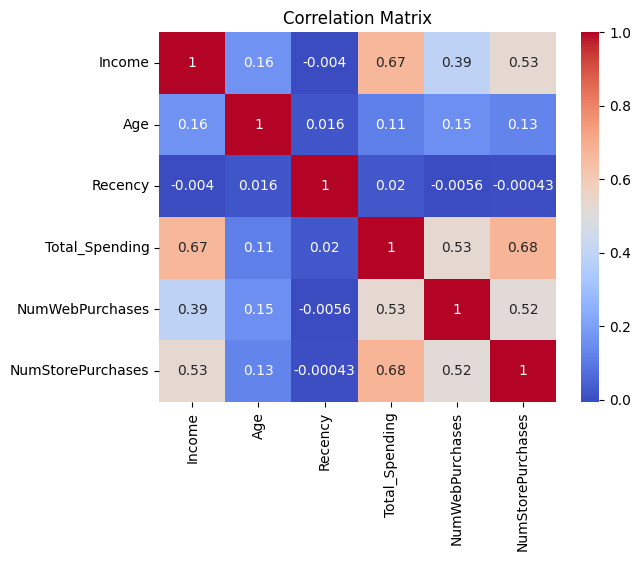

In [31]:
sns.heatmap(corr, annot= True, cmap="coolwarm"  )
plt.title("Correlation Matrix")
plt.show()

In [32]:
pivot_income= df.pivot_table(values= "Income", index="Education", columns="Marital_Status", aggfunc="mean" )
print(pivot_income)

Marital_Status   Absurd    Alone      Divorced       Married        Single  \
Education                                                                    
2n Cycle            NaN      NaN  49395.130435  46201.100000  53673.944444   
Basic               NaN      NaN   9548.000000  21960.500000  18238.666667   
Graduation      79244.0  34176.0  54526.042017  50800.258741  51322.182927   
Master          65487.0  61331.0  50331.945946  53286.028986  53530.560000   
PhD                 NaN  35860.0  53096.615385  58138.031579  53314.614583   

Marital_Status      Together         Widow     YOLO  
Education                                            
2n Cycle        44736.410714  51392.200000      NaN  
Basic           21240.071429  22123.000000      NaN  
Graduation      55758.480702  54976.657143      NaN  
Master          52109.009804  58401.545455      NaN  
PhD             56041.422414  60288.083333  48432.0  


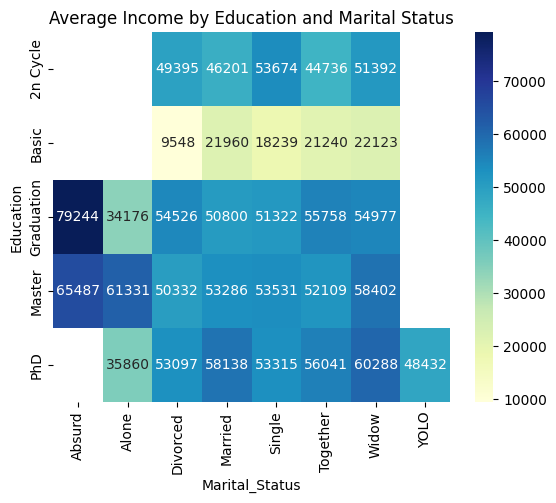

In [33]:
sns.heatmap(pivot_income, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Income by Education and Marital Status")
plt.show()

In [34]:
group_1 = df.groupby("Education")["Total_Spending"].mean().sort_values(ascending=False)
print(group_1 )

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64


* The purpose of running this code is to determine the average spending amount of customers based on their education level, and to sort them from the highest-spending education group to the lowest.

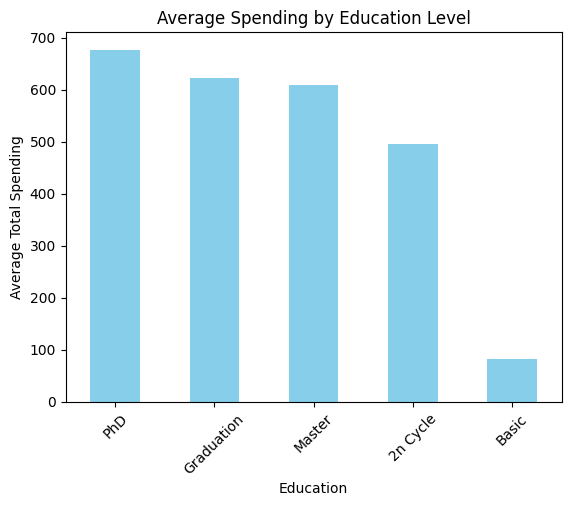

In [35]:
group_1.plot(kind="bar", color="skyblue")
plt.title("Average Spending by Education Level")
plt.ylabel("Average Total Spending")
plt.xticks(rotation=45)
plt.show()

In [36]:
df["AcceptedAny"]= df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [37]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [38]:
df["AcceptedAny"]= df["AcceptedAny"].apply(lambda x:1 if x > 0 else 0)

In [39]:
df["AcceptedAny"].unique()

array([1, 0])

In [40]:

group_2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)
print(group_2)

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64


* Targeting Effectiveness
* Personalization
* Resource Allocation

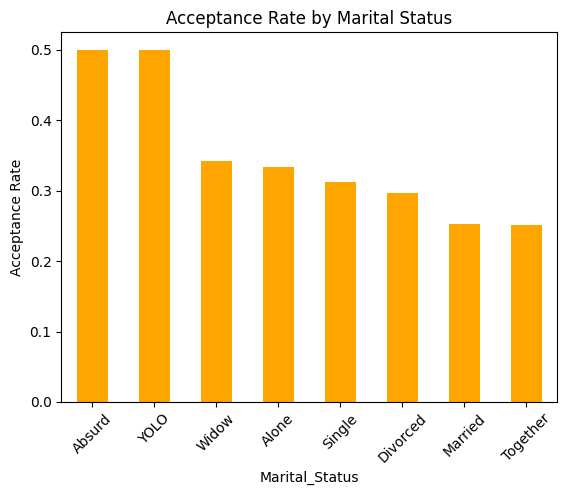

In [41]:
group_2.plot(kind="bar", color="orange")
plt.title("Acceptance Rate by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.show()

In [42]:
bins=[18, 30, 40, 50, 60, 70 ,90 ]

In [43]:
labels=["18-29","30-39","40-49","50-59","60-69","70+"]

In [44]:
df["AgeGroup"]= pd.cut(df["Age"], bins= bins, labels= labels)

In [45]:
df["AgeGroup"]

,AgeGroup
0,60-69
1,70+
2,50-59
3,40-49
4,40-49
...,...
2235,50-59
2236,70+
2237,40-49
2238,60-69


In [46]:
group_3= df.groupby("AgeGroup")["Income"].mean()

/tmp/ipython-input-3113722119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_3= df.groupby("AgeGroup")["Income"].mean()


In [47]:
group_3

,Income
AgeGroup,
18-29,46658.000000
30-39,46283.028302
40-49,49224.877034
50-59,50812.913303
60-69,56200.827887
70+,58944.316294


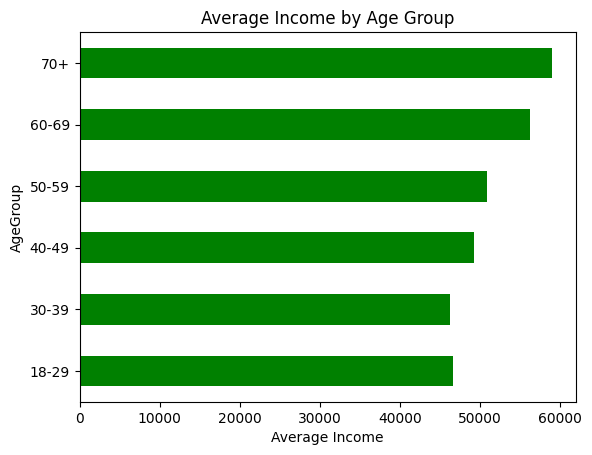

In [48]:
group_3.plot(kind="barh", color="green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()

In [49]:
# Lets check columns for new craeated:

df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Childeren', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [50]:
# Lets select 4 or 5 features for customer demografics:

features=["Age","Income","Total_Spending","Total_Childeren","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [51]:
X= df[features].copy()
X

,Age,Income,Total_Spending,Total_Childeren,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,0,8,4,7,58
1,71,46344.0,27,2,1,2,5,38
2,60,71613.0,776,0,8,10,4,26
3,41,26646.0,53,1,2,4,6,26
4,44,58293.0,422,1,5,6,5,94
...,...,...,...,...,...,...,...,...
2235,58,61223.0,1341,1,9,4,5,46
2236,79,64014.0,444,3,8,5,7,56
2237,44,56981.0,1241,0,2,13,6,91
2238,69,69245.0,843,1,6,10,3,8


In [52]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [53]:
X_scaled= scaler.fit_transform(X)

In [54]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [55]:
from sklearn.cluster import KMeans

In [56]:
wcss=[]

In [57]:
for i in range(2,10):
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

In [58]:
wcss

[11993.55784662109,
 11040.440097351917,
 9687.110853436461,
 9032.76152850786,
 8671.384634078096,
 8122.4569966282925,
 7755.59441093229,
 7436.210646149488]

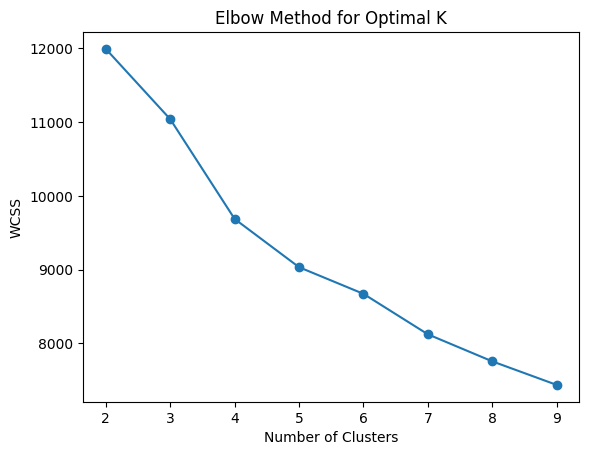

In [59]:
plt.plot(range(2,10),wcss, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [60]:
kmeans= KMeans(n_clusters= 6)
df["Cluster"]= kmeans.fit_predict(X_scaled)

print(df["Cluster"])


0       2
1       3
2       0
3       1
4       0
       ..
2235    2
2236    3
2237    4
2238    5
2239    3
Name: Cluster, Length: 2216, dtype: int32


In [61]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Childeren,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4827,1,60-69,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4277,0,70+,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4476,0,50-59,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4303,0,40-49,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4325,0,40-49,0


In [62]:
# Analyzing Clusters:
cluster_summary = df.groupby("Cluster")[features].mean()




In [63]:
cluster_summary

,Age,Income,Total_Spending,Total_Childeren,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,,
0,57.666667,64189.521212,987.593939,1.036364,6.730303,9.648485,5.272727,64.224242
1,47.786311,29432.646077,96.450751,0.819699,2.103506,3.075125,6.856427,49.096828
2,60.493827,55170.108025,668.354938,1.074074,6.941358,6.364198,6.419753,28.910494
3,61.067130,41740.655093,122.537037,1.946759,2.215278,3.425926,6.032407,52.168981
4,44.598326,80986.188285,1469.041841,0.050209,4.757322,8.548117,2.435146,47.669456
5,69.178082,74330.256849,1167.859589,0.222603,4.208904,7.684932,2.301370,50.383562


In [64]:
df["Cluster"].value_counts()

,count
Cluster,
1,599
3,432
0,330
2,324
5,292
4,239


**PCA**

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components= 2)
pca_data= pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"]= pca_data[:, 0], pca_data[:,1]

In [67]:
pca_data

array([[ 1.40719749,  0.7840593 ],
       [-1.72975111,  0.78198214],
       [ 2.15961204,  0.1467107 ],
       ...,
       [ 1.5292152 , -1.19009391],
       [ 1.74781886,  0.79516358],
       [-1.28782471,  1.46861948]])

In [68]:
df["PCA1"]

,PCA1
0,1.407197
1,-1.729751
2,2.159612
3,-1.675830
4,0.011092
...,...
2235,1.146706
2236,-0.474383
2237,1.529215
2238,1.747819


In [69]:
df["PCA2"]

,PCA2
0,0.784059
1,0.781982
2,0.146711
3,-1.161664
4,-0.362899
...,...
2235,0.835604
2236,3.504369
2237,-1.190094
2238,0.795164


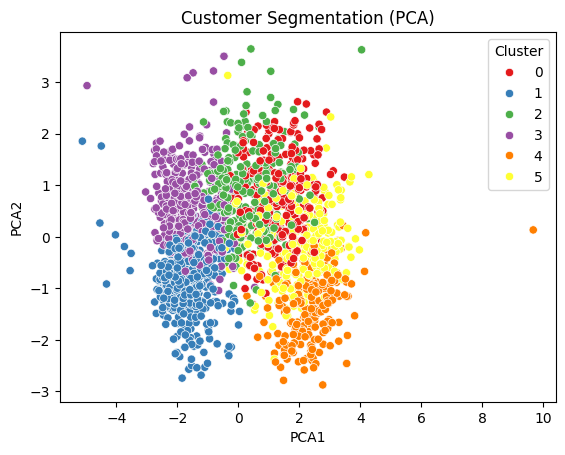

In [70]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data= df, palette="Set1")
plt.title("Customer Segmentation (PCA)")
plt.show()

In [71]:
cluster_summary

,Age,Income,Total_Spending,Total_Childeren,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,,
0,57.666667,64189.521212,987.593939,1.036364,6.730303,9.648485,5.272727,64.224242
1,47.786311,29432.646077,96.450751,0.819699,2.103506,3.075125,6.856427,49.096828
2,60.493827,55170.108025,668.354938,1.074074,6.941358,6.364198,6.419753,28.910494
3,61.067130,41740.655093,122.537037,1.946759,2.215278,3.425926,6.032407,52.168981
4,44.598326,80986.188285,1469.041841,0.050209,4.757322,8.548117,2.435146,47.669456
5,69.178082,74330.256849,1167.859589,0.222603,4.208904,7.684932,2.301370,50.383562


In [ ]:
# Making so advanced: Write a definitions of clusters
Cluster 0 High Income Hight Total_Spending ---> Premium Customers
Cluster 1 High Web Purchases Low Store Purchases ---> Digital Buyers
Cluster 4 Low Income Low Total_Spending ---> Budget Customers
Cluster 5 Low Recency inactive ---> Dormant Customers


In [73]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

**SEGMENTATION**

In [75]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.8 MB/s eta 0:00:00


In [76]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib


In [77]:
kmeans= joblib.load("kmeans_model.pkl")
scaler= joblib.load("scaler.pkl")

In [78]:
st.title("Customer Segmentation App")
st.write("Enter customer details to predict the segment")

2025-11-22 11:05:34.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:05:34.593 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:05:34.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:05:34.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:05:34.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:05:34.598 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [81]:
age= st.number_input("Age", min_value= 18, max_value= 100, value= 35)
income= st.number_input("Income", min_value= 0, max_value= 200000, value= 50000)
total_spending= st.number_input("Total Spending (sum of purchases)", min_value= 0, max_value= 5000, value= 1000)
num_web_purchases= st.number_input("Number of Web Purchases", min_value= 0, max_value= 100, value= 10)
num_store_purchases= st.number_input("Number of Store Purchases", min_value= 0, max_value= 100, value= 10)
num_web_visits= st.number_input("Number of Web Vistis per Month", min_value= 0, max_value= 50, value= 3)
recency= st.number_input("Recency (Days since last purchase)", min_value= 0, max_value= 365, value= 30)



input_data = pd.DataFrame({
    "Age":[age],
    "Income":[income],
    "Total_Spending": [total_spending],
    "NumWebPurchases": [num_web_purchases],
    "NumStorePurchases": [num_store_purchases],
    "NumWebVisits":[num_web_visits],
    "Recency":[recency]


})

input_scaled= scaler.transform(input_data)

if st.button("Predict Segment"):

   cluster= kmeans.predict(input_scaled)[0]

   st.success(f"Predicted Segment: Cluster {cluster} ")

   st.write("""
            Cluster 0: High Budget, Web Visitors
            Cluster 1: High Spending
            Cluster 2: Wen Visitors


   """)


2025-11-22 11:40:53.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:40:53.007 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:40:53.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:40:53.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:40:53.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:40:53.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:40:53.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 11:40:53.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- NumWebVisits
Feature names seen at fit time, yet now missing:
- NumWebVisitsMonth
- Total_Childeren


In [82]:
!pip install streamlit pyngrok

In [83]:
%%writefile app.py
# Buraya tüm Streamlit kodunuzu yapıştırın (importlar, arayüz, tahmin kısmı)
# Örn:
# import streamlit as st
# st.title("Müşteri Segmentasyonu")
# ...

Writing app.py


In [90]:
!rm /root/.config/ngrok/ngrok.yml